<a href="https://colab.research.google.com/github/dhikaainul/Machine_Learning_Quiz_2/blob/main/ML_Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import package
import numpy as np
import pandas as pd

In [3]:
# baca data
df = pd.read_csv('dataset_quiz.csv')
df.head()

,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain,Unnamed: 10,Unnamed: 11,warna,jenis bunga,Unnamed: 14,warna.1,jenis bunga.1,Unnamed: 17
0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA,NaN,NaN,abang banget,mawar,NaN,abang banget,mawar,NaN
1,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA,NaN,NaN,abang banget,mawar,NaN,abang banget,mawar,NaN
2,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA,NaN,NaN,ping,kamboja,NaN,ping,kamboja,NaN
3,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA,NaN,NaN,ptih tuang,melati,NaN,ptih tuang,melati,NaN
4,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA,NaN,NaN,abang banget,mawar,NaN,NaN,NaN,NaN


In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain,Unnamed: 10,Unnamed: 11,warna,jenis bunga,Unnamed: 14,warna.1,jenis bunga.1,Unnamed: 17
0,0,0,0,1,1,1,1,0,3,1,0,0,0,1,0,0,3,1
1,0,0,0,1,1,1,1,0,3,1,0,0,0,1,0,0,3,1
2,0,0,0,1,1,1,1,0,3,1,0,0,2,0,0,2,0,1
3,0,0,0,1,1,1,1,0,3,1,0,0,4,2,0,3,4,1
4,0,0,0,1,1,1,1,0,3,1,0,0,0,1,0,5,5,1


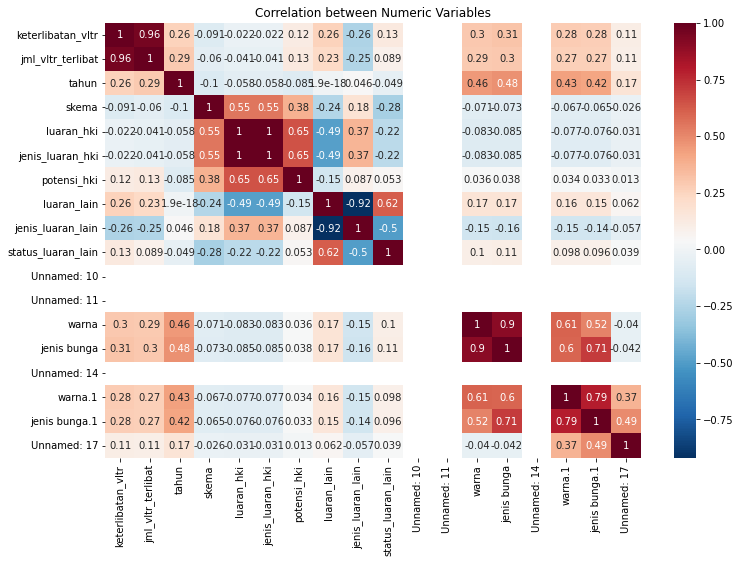

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_pearson = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, cmap="RdBu_r",annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()

In [6]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

Jumlah data asli: 68
Jumlah data train: 54
Jumlah data val: 7
Jumlah data test: 7


In [7]:
# Seleksi fitur

# Slice dataframe mulai dari kolom 'radius_mean' sampai 'fractal_dimension_worst'
X = df.iloc[:,1:]
y = df['luaran_hki']

# Cek jumlah fitur dan instance
X.shape

(68, 17)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Traning Decision Tree

In [12]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 1.00
Test set accuracy: 1.0


### Training RandomForest

In [13]:
# Pada kasus kali ini kita akan menggunakan seluruh parameter default dari RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 1.00
Test set accuracy: 1.0


In [1]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = df['jml_vltr_terlibat']
y = df['keterlibatan_vltr']

NameError: ignored